## **Car Price Analysis**

### Objective  

The goal of this project is to study car price differences and patterns in the Indian used car market, focusing on three cities: **Coimbatore, Kolkata, and Jaipur**.  

### Main Goals  

- **Descriptive Analysis**  
  Summarize the dataset to check the spread of important features like year of manufacture, kilometers driven, fuel type, transmission, owner type, and seating capacity.  

- **Price Analysis**  
  Look into the key factors that affect the resale value of cars. Study how price is related to features such as year, kilometers driven, fuel type, engine size, and power.  

- **Geographical Insights**  
  Compare car prices and sales across the three cities to see which places have higher or lower resale values.  

- **Trend Analysis**  
  Understand how car prices have changed over time and how the year of manufacturing impacts resale prices.  

- **Handling Missing Data**  
  Fix missing values in columns like Mileage, Engine, Power, Seats, New_Price, and Price. Use suitable methods such as mean, median, mode, or prediction-based filling.  

- **Correlation Check**  
  Measure the relationship strength between numerical features and resale price using correlation analysis.  


In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Car.csv").drop(columns=['S.No.'], axis =1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
df.shape

(7253, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

**Data Handling**

In [9]:
df[['Mileage(kmpl)', 'Unit']] = df['Mileage'].str.split(' ', expand=True)
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage(kmpl),Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [11]:
def unit_conversion(mileage,unit):
    if unit == 'km/kg':
        return mileage *1.4
    else:
        return mileage

df['Mileage(kmpl)'] = df.apply(lambda x: unit_conversion(x['Mileage(kmpl)'], x['Unit']), axis=1)

In [12]:
df['Mileage(kmpl)']

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage(kmpl), Length: 7253, dtype: float64

In [13]:
# Handling Engine Column to split the values into two columns as Engine(CC) and Unit
# Replace null values with None
# Data Type Convertio to int
df[['Engine(CC)', 'Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine(CC)'].replace({'null':None}, inplace=True)
df['Engine(CC)'].fillna(0, inplace=True)
df['Engine(CC)'] = df['Engine(CC)'].astype('int')

In [14]:
# Handling Power Column to split the values into two columns as Power(bhp) and Unit
# Replace null values with '0'
# Data Type Convertio to int
df[['Power(bhp)', 'Unit']] = df['Power'].str.split(' ', expand=True)
df['Power(bhp)'].replace({'null':'0'}, inplace=True)
df['Power(bhp)'].fillna(0, inplace=True)
df['Power(bhp)'] = df['Power(bhp)'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Mileage(kmpl)      7251 non-null   float64
 14  Unit               7207 non-null   object 
 15  Engine(CC)         7253 non-null   int64  
 16  Power(bhp)         7253 

In [16]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Mileage(kmpl)           2
Unit                   46
Engine(CC)              0
Power(bhp)              0
dtype: int64

In [17]:
# Handling the Price column by replacing null values with the mean of the column

df['Price'].fillna(df['Price'].mean(),inplace=True)

In [18]:
# Handling the Seats column by replacing null values with the median of the column

df['Seats'].fillna(df['Seats'].median(),inplace=True)

In [19]:
# Handling the kmpl column by replacing null values with the mean of the column

df['Mileage(kmpl)'].fillna(df['Mileage(kmpl)'].mean(),inplace=True)

**Data Reduction**

In [20]:
df.drop(columns=['New_Price','Mileage','Power','Engine','Unit'],axis=1,inplace=True)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

**Feature Engineering**

In [23]:
df['Brand'] = df['Name'].str.split().str.get(0)
df['Model'] = df['Name'].str.split().str.get(1) +''+df['Name'].str.split().str.get(2)

In [24]:
df[['Brand','Model']]

,Brand,Model
0,Maruti,WagonR
1,Hyundai,Creta1.6
2,Honda,JazzV
3,Maruti,ErtigaVDI
4,Audi,A4New
...,...,...
7248,Volkswagen,VentoDiesel
7249,Volkswagen,PoloGT
7250,Nissan,MicraDiesel
7251,Volkswagen,PoloGT


In [25]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [26]:
len(df['Model'].unique())

727

In [27]:
df['Brand'].replace({'Land': 'Land Rover', 'Mini': 'Mini Cooper', 'ISUZU': 'Isuzu'}, inplace = True)

In [28]:
df['Model']= df['Model'].str.lower()

In [29]:
from  datetime import date
today = date.today()
today.year


2025

In [30]:
df['Car_Age']= today.year - df['Year']

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.000000,2019.000
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.000000,6500000.000
Seats,7252.0,5.277716,0.809088,0.00,5.00,5.00,5.000000,10.000
Price,7252.0,9.479468,10.192398,0.44,3.85,6.75,9.479468,160.000
Mileage(kmpl),7252.0,18.241157,4.839563,0.00,15.26,18.20,21.100000,46.956
Engine(CC),7252.0,1606.335907,607.154934,0.00,1197.00,1462.00,1968.000000,5998.000
Power(bhp),7252.0,110.043324,55.609120,0.00,74.00,91.10,138.030000,616.000
Car_Age,7252.0,11.634170,3.254405,6.00,9.00,11.00,14.000000,29.000


In [32]:
df.describe(include= 'object').T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,948
Fuel_Type,7252,5,Diesel,3852
Transmission,7252,2,Manual,5203
Owner_Type,7252,4,First,5951
Brand,7252,32,Maruti,1444
Model,7251,705,swiftdzire,189


## Key Findings from Data Summary  

Based on the dataset statistics, the following points were observed:  

- **Year of Cars**  
  The data covers cars from **1996 to 2019**, which means both old and new models are available.  

- **Kilometers Driven**  
  The average distance covered by used cars is around **58,000 km**. However, the maximum value is **650,000 km**, which is far too high and looks like an outlier. Such values can be removed.  

- **Mileage Issues**  
  Some cars show a minimum mileage of **0**, which is not realistic. This is most likely a data entry mistake.  

- **Engine & Power**  
  Both engine capacity and power columns have outliers, and their distribution is **right-skewed**.  

- **Seats**  
  On average, most cars have **5 seats**. Seating capacity plays an important role in deciding the resale price.  

- **Price Outlier**  
  The maximum resale price in the data is **160,000**, which seems unusually high for a used car. This might be due to wrong data entry or an outlier.  

- **Summary Function**  
  Using `describe(include='all')` gives an overall summary of both numerical and categorical columns.  

**Data Visualization**

In [33]:
numerical= df.select_dtypes(include=['int', 'float']).columns
categorical= df.select_dtypes(exclude=['int', 'float']).columns

print(numerical)
print(categorical)

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age'],
      dtype='object')
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')


## EDA - Univariate Analysis  

**Introduction**  
In this step, we look at **one variable at a time** to understand its distribution and basic patterns.  
For this, we use **Matplotlib** and **Seaborn** libraries:  

- **Matplotlib** → A Python plotting library used for simple 2D charts.  
- **Seaborn** → Built on top of Matplotlib, it makes it easy to create and style statistical plots with fewer lines of code.  

Univariate analysis can be applied to both **categorical** and **numerical** data.  

- **Categorical variables** → Best shown using Count plots, Bar charts, Pie charts, etc.  
- **Numerical variables** → Usually visualized using Histograms, Box plots, or Density plots.  

In this project, we used **Histograms** and **Box plots** for continuous variables to check their spread, skewness, and outliers.  

<Figure size 1000x800 with 0 Axes>

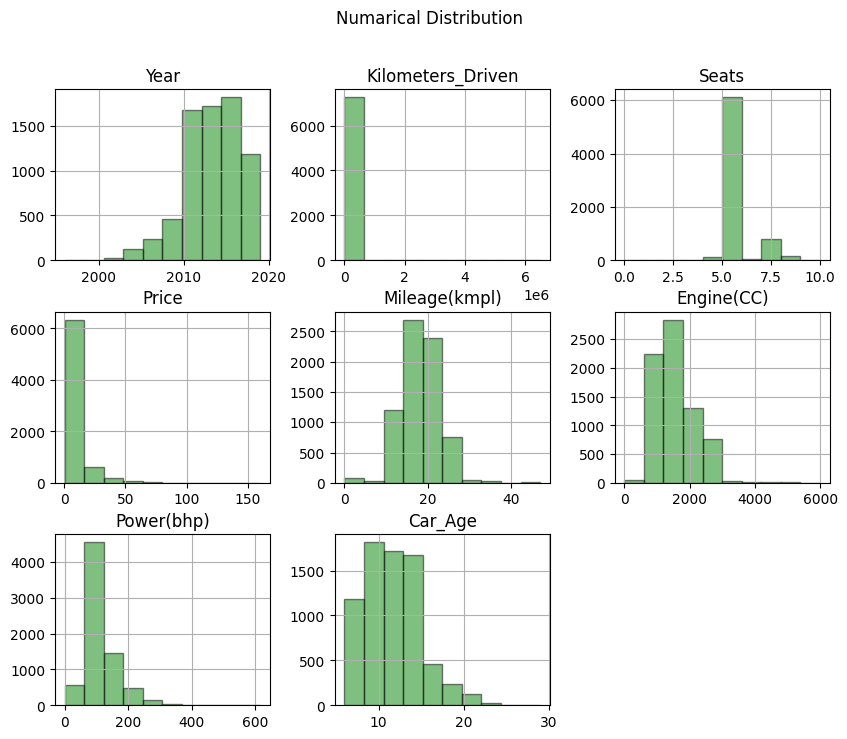

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
df.hist(figsize=(10,8), bins=10,color='g' ,edgecolor='k', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.suptitle("Numarical Distribution")
plt.show()

### Observations  

### General Distribution  
- **Year** → Most cars were made between **2010 and 2020**.  
- **Kilometers Driven** → Majority of cars are below **2,000,000 km**.  
- **Seats** → **5-seater cars** dominate the market.  
- **Price** → Most cars are priced below **50 units**.  
- **Mileage (kmpl)** → Most cars fall between **10–30 kmpl**.  
- **Engine (CC)** → Engines usually range from **1000 to 3000 CC**.  
- **Power (bhp)** → Majority have **less than 200 bhp**.  
- **Car Age** → Most cars are between **5–15 years old**.  


Name


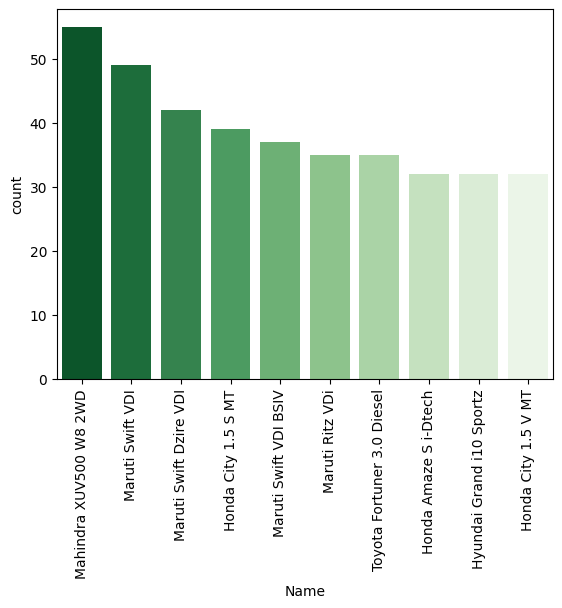

Location


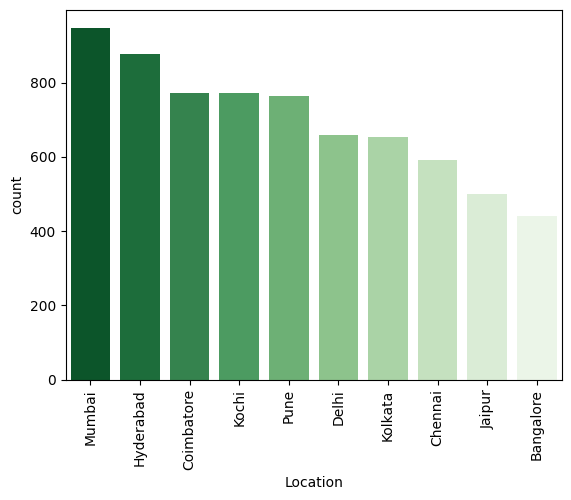

Fuel_Type


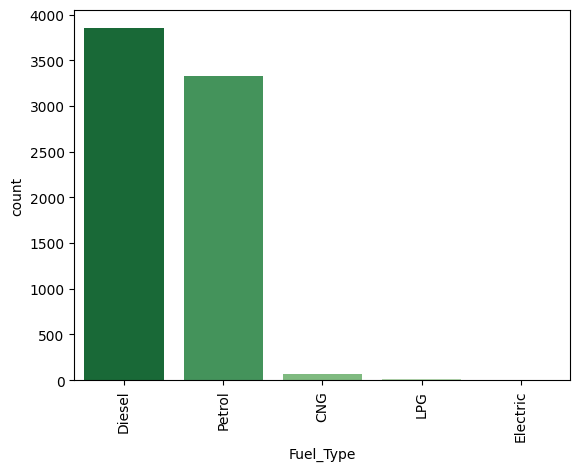

Transmission


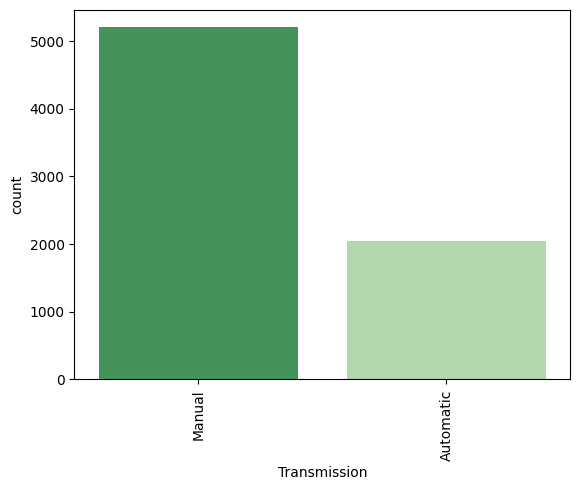

Owner_Type


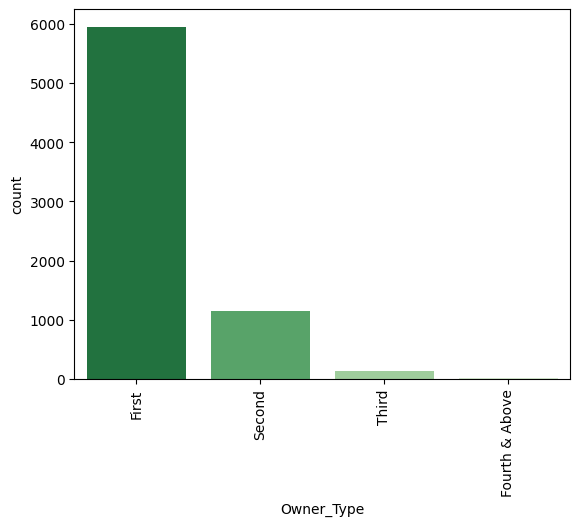

Brand


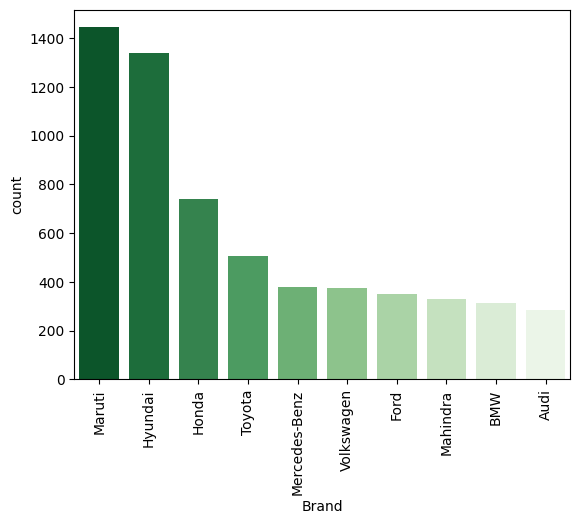

Model


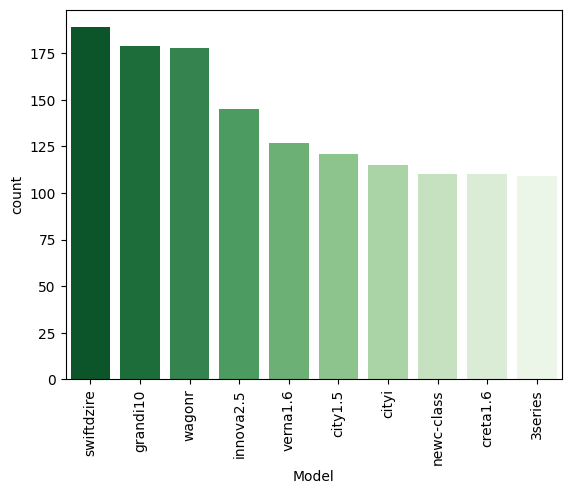

In [35]:
import seaborn as sns 

for col in categorical:
    print(col)
    sns.countplot(data=df,x=col, order=df[col].value_counts().head(10).index,palette='Greens_r')
    plt.xticks(rotation=90)
    plt.show()
    

### Detailed Chart Insights  
- **Year** → Highest count of cars around **2015**, with a decline after 2018. The lowest count is in **2009**.  
- **Kilometers Driven** → Cars driven about **60,000 km** are most common, while those at **30,000 km** are least.  
- **Seats** → **5 seats** is the most popular option, far higher than other seating capacities.  
- **Price** → The most frequent price point is around **9.48 units**.  
- **Mileage** → Cars with **17.0 kmpl** mileage appear the most, while **16.0 kmpl** is the least common.  
- **Engine** → **1197 CC engines** are most frequent, while **1461 CC engines** are least.  
- **Power** → Cars with **74 bhp** power are common, other power values appear much less.  
- **Car Age** → Cars aged **10–11 years** show the highest frequency, while **16-year-old cars** are rare. 

In [36]:
mileage= df.groupby('Brand')['Mileage(kmpl)'].mean().sort_values(ascending= False)
mileage

Brand
Maruti           21.925573
Datsun           21.345294
Renault          20.727471
Tata             20.033202
Nissan           19.229915
Hyundai          18.726218
Mini Cooper      18.581935
Ford             18.476382
Honda            18.458625
Chevrolet        18.306556
Volkswagen       18.288316
Fiat             17.389474
Force            17.000000
BMW              16.976026
Skoda            16.897228
Jeep             16.731579
Audi             15.360140
Mahindra         15.175683
Volvo            15.030714
Jaguar           14.889375
Toyota           14.464247
OpelCorsa        14.200000
Hindustan        14.100000
Mercedes-Benz    13.933368
Porsche          13.601579
Ambassador       12.800000
Isuzu            12.616000
Mitsubishi       12.291667
Land Rover       10.915970
Bentley           9.400000
Lamborghini       6.400000
Smart             0.000000
Name: Mileage(kmpl), dtype: float64

In [37]:
power = df.groupby('Brand')['Power(bhp)'].mean().sort_values(ascending= False)
power

Brand
Bentley          584.000000
Lamborghini      560.000000
Porsche          291.610526
Jaguar           236.216458
BMW              206.000929
Mercedes-Benz    192.601763
Audi             188.675895
Volvo            188.464286
Land Rover       180.294627
Jeep             168.947368
Isuzu            147.514000
Mini Cooper      146.656774
Mitsubishi       145.193333
Force            139.030000
Skoda            125.369059
Toyota           121.893491
Mahindra         118.025076
Honda            107.414717
Volkswagen        94.507848
Ford              94.168148
Chevrolet         90.307285
Hyundai           88.301000
OpelCorsa         88.000000
Renault           87.510471
Nissan            86.635726
Tata              76.908289
Fiat              74.971053
Maruti            71.950145
Datsun            60.644706
Ambassador        35.500000
Smart              0.000000
Hindustan          0.000000
Name: Power(bhp), dtype: float64

In [38]:
engine = df.groupby('Brand')['Engine(CC)'].mean().sort_values(ascending= False)
engine

Brand
Bentley          5998.000000
Lamborghini      5204.000000
Porsche          3452.684211
Isuzu            2699.000000
Jaguar           2571.750000
Mitsubishi       2542.027778
Land Rover       2358.164179
Mercedes-Benz    2356.773684
Toyota           2287.445759
BMW              2278.314103
Audi             2245.452632
Force            2183.000000
Volvo            2175.607143
Mahindra         2114.006042
Hindustan        1995.000000
Jeep             1894.105263
Skoda            1773.267327
Mini Cooper      1758.645161
Ford             1583.575499
Nissan           1492.837607
Honda            1491.047170
Ambassador       1489.000000
Volkswagen       1438.783422
OpelCorsa        1389.000000
Chevrolet        1370.125828
Tata             1331.640351
Renault          1321.235294
Hyundai          1298.803731
Fiat             1139.894737
Maruti           1136.608033
Datsun           1010.235294
Smart             799.000000
Name: Engine(CC), dtype: float64

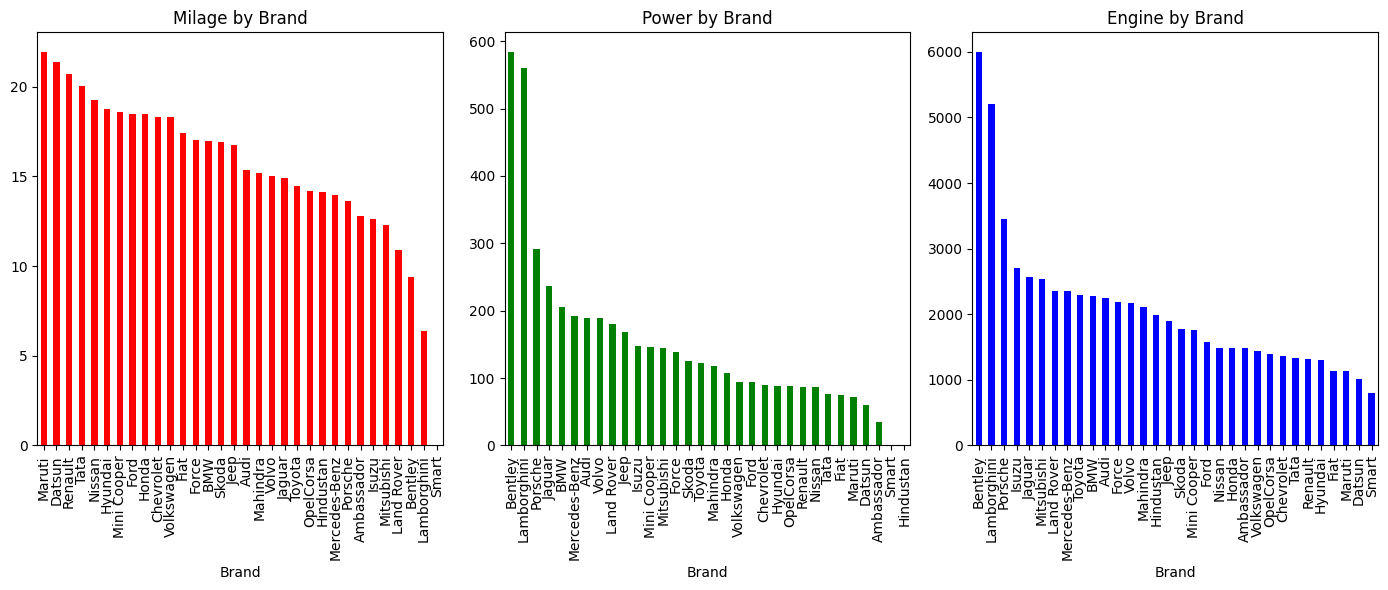

In [39]:
fig,ax=plt.subplots(1,3,figsize=(14,6))
mileage.plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Milage by Brand')

power.plot(kind='bar',ax=ax[1],color='g')
ax[1].set_title('Power by Brand')

engine.plot(kind='bar',ax=ax[2],color='b')
ax[2].set_title('Engine by Brand')

plt.tight_layout()
plt.show()

## Mileage by Brand (Red Bars)  
- **Maruti** shows the best mileage among all brands.  
- Next in line are **Datsun, Renault, Tata, and Nissan** with fairly high mileage.  
- Mileage gradually drops as we move across other brands.  
- **Smart** cars have the lowest mileage.  

---

## Power by Brand (Green Bars)  
- **Bentley** delivers the highest power output.  
- This is followed by **Lamborghini, Porsche, and Jaguar**.  
- Other brands show a steady decline in power values.  
- **Smart** again comes last in terms of power.  

---

## Engine Size by Brand (Blue Bars)  
- **Bentley** also tops in engine size.  
- Next come **Lamborghini, Porsche, and ISUZU**.  
- Engine capacity decreases step by step for other brands.  
- **Smart** has the smallest engines. 

In [40]:
features =[
    ('Location', 'Location by Price'),
    ('Transmission', 'Trannsmission by price'),
    ('Fuel_Type', 'Fuel_Type by Price'),
    ('Owner_Type', 'Owner_Type by price'),
    ('Seats', 'Seats by Price'),
    ('Brand', 'Brand by Price'),
    ('Model', 'Model by Price'),
    ('Car_Age', 'Car_Age by Price')
]

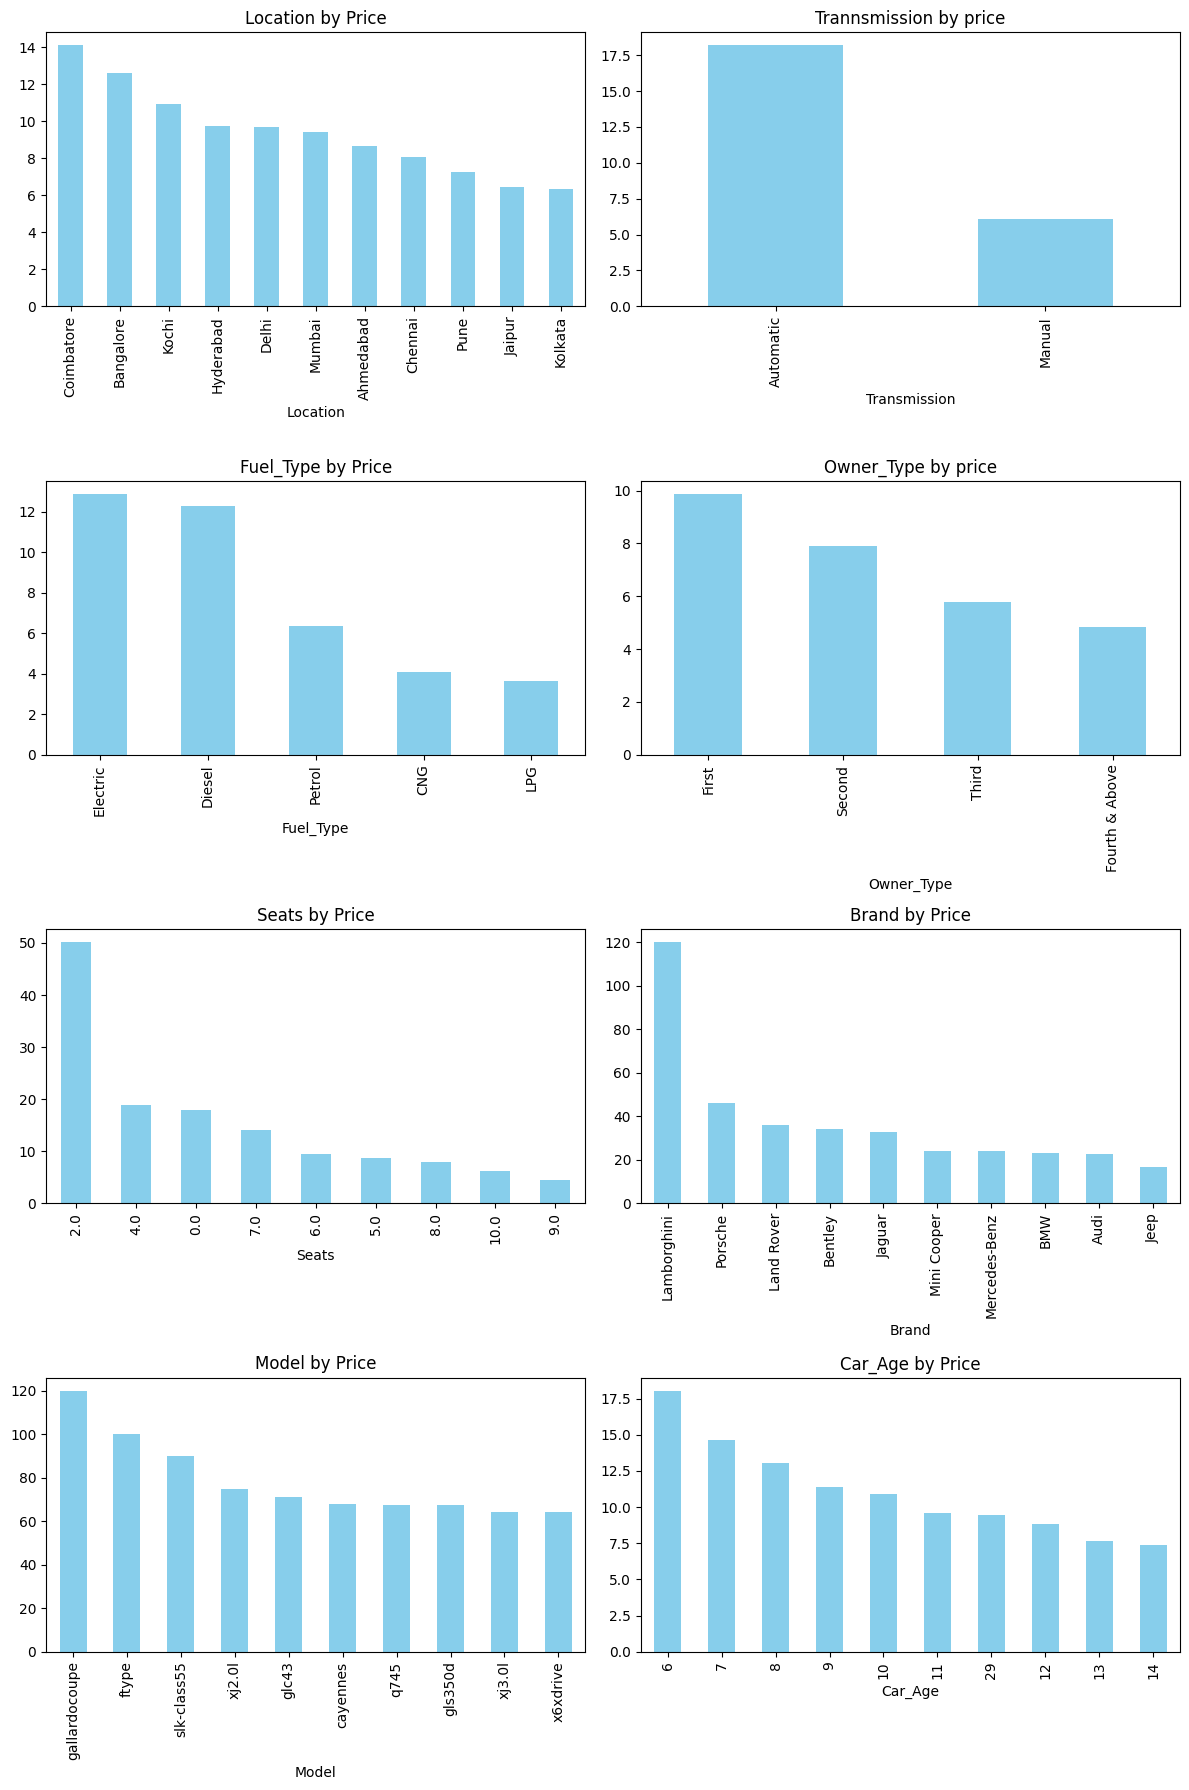

In [41]:
fig, ax= plt.subplots(4,2, figsize=(12, 18))

for i, (feature, title) in enumerate(features):
    row, col= divmod(i, 2)
    if feature in ['Brand', 'Model', 'Car_Age']:
        df.groupby(feature)['Price'].mean().sort_values(ascending= False).head(10).plot.bar(ax= ax[row][col], color='skyblue')
    else:
        df.groupby(feature)['Price'].mean().sort_values(ascending= False).plot.bar(ax= ax[row][col], color='skyblue')
    ax[row][col].set_title(title)

plt.tight_layout()
plt.show()

#### City-wise Price Variation  
- Car prices are **highest in Coimbatore**.  
- **Kolkata and Jaipur** have the lowest price ranges.  

---

#### Transmission Type  
- **Automatic cars** are priced higher compared to manuals.  

---

#### Fuel Type  
- **Diesel and Electric cars** show the highest average prices.  
- **LPG cars** are the cheapest among all.  

---

#### Ownership  
- **First-owner cars** have the highest resale value.  
- **Second-owner cars** are slightly lower.  
- Surprisingly, **third-owner cars** are valued lower than **fourth-owner cars and above**.  

---

#### Brand  
- **Lamborghini** is the most expensive brand.  
- Other costly brands include **Porsche, Land Rover, and Bentley**.  

---

#### Model  
- The **Gallardocoupe** is the costliest model.  
- Other high-priced models include **F-Type, SLK-Class 55, and XJ 20.1**.  

---

#### Seating Capacity  
- **2-seater cars** are the most expensive.  
- **4-seaters** follow next.  
- As seating capacity increases, the price tends to fall.  

---

#### Car Age  
- **Newer cars (around 6 years old)** are priced higher.  
- Prices fall steadily for **cars older than 10 years**. 

In [42]:
corr= df[numerical].corr()
corr

,Year,Kilometers_Driven,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age
Year,1.000000,-0.187884,0.010801,0.279470,0.305710,-0.033990,0.082268,-1.000000
Kilometers_Driven,-0.187884,1.000000,0.089834,-0.011318,-0.066180,0.090566,0.018136,0.187884
Seats,0.010801,0.089834,1.000000,0.047949,-0.293963,0.395717,0.106925,-0.010801
Price,0.279470,-0.011318,0.047949,1.000000,-0.275584,0.594782,0.689106,-0.279470
Mileage(kmpl),0.305710,-0.066180,-0.293963,-0.275584,1.000000,-0.537824,-0.413650,-0.305710
Engine(CC),-0.033990,0.090566,0.395717,0.594782,-0.537824,1.000000,0.839328,0.033990
Power(bhp),0.082268,0.018136,0.106925,0.689106,-0.413650,0.839328,1.000000,-0.082268
Car_Age,-1.000000,0.187884,-0.010801,-0.279470,-0.305710,0.033990,-0.082268,1.000000


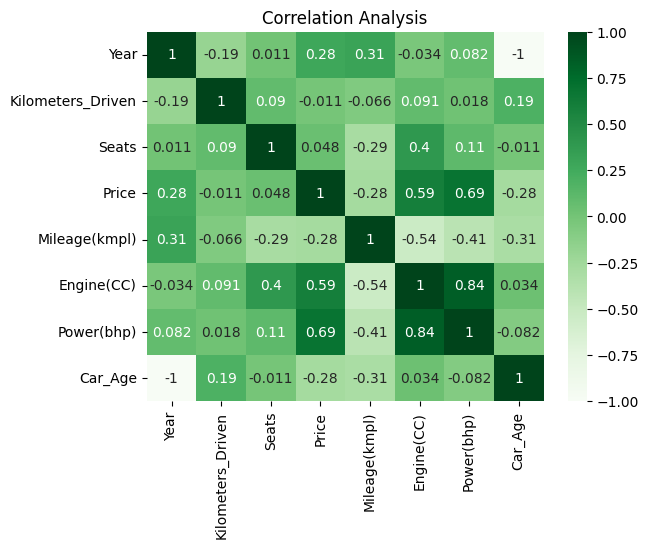

In [43]:
sns.heatmap(corr, annot= True, cmap='Greens')
plt.title('Correlation Analysis')

plt.show()

#### Key Insight  
Cars with **bigger and more powerful engines** usually come with a higher price tag.  
At the same time, **newer cars** (lower in age) tend to cost more than older ones.  


## Conclusion  
Car prices depend on many factors such as:    
- Transmission type (Automatic or Manual)  
- Fuel type  
- Number of previous owners  
- Brand and Model  
- Seating capacity  
- Age of the car  

By understanding these patterns, buyers can make better choices that match both their **needs and budget**.  